In [87]:
import numpy as np
import pandas as pd
from sys import getsizeof
import scipy.sparse
from auto_tqdm import tqdm


In [64]:
image = np.random.rand(11,3,1300,1300) # Test array with dimensions z,c,y,x
n_channels = image.shape[1]

In [65]:
image.shape

(11, 3, 1300, 1300)

In [67]:
#multilabel mask with dimensions (z,y,x)
mask = np.random.rand(11, 1300, 1300)
mask = mask*1200
mask = mask.astype(int)
mask.shape

(11, 1300, 1300)

In [73]:
# Measurement will be an array of shape: (n_channel, n_label, n_features)
# features are: n_pixels, sum_intensity
n_features = 2
measurement = np.zeros((n_channels, mask.max(), n_features))

In [69]:
labels = np.unique(mask)
n_labels = len(labels)

In [83]:
# encode:
m = np.eye(n_labels, dtype = np.bool)[mask]

In [84]:
getsizeof(m)*1e-9

22.308000144

In [89]:
sums = []
for l in tqdm(range(m.shape[3])):
    for c in range(image.shape[1]):
        img_c = image[:, c, ...]
        _ = m[...,l]
        sums.append(img_c[_].sum())

  0%|                                                                                         | 0/1200 [00:00<…

KeyboardInterrupt: 

In [58]:
rows = np.arange(mask[0].size)
rows

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

In [17]:
n_pixels = np.unique(mask, return_counts = True)
n_pixels

(array([0, 1, 2, 3, 4]), array([19, 15, 14, 13, 14], dtype=int64))

In [46]:
)

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [48]:
dim_y = 5
dim_x = 5
n_labels = len(np.unique(mask))
print(n_labels)

labels = np.zeros((dim_y, dim_x, n_labels))
labels[mask[0].tolist()] = 1
labels

5


<ipython-input-48-ac2d1800e033>:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  labels[mask[0].tolist()] = 1


IndexError: too many indices for array: array is 3-dimensional, but 5 were indexed

In [27]:
for n in range(n_channels):
    image_channel = image[:,n,...]
    for label in labels:
        selection = np.where(mask == label, image_channel, 0)
        _sum = selection.sum()
        _n_pixel = (selection>0).sum()

In [29]:
_n_pixel

12

In [26]:
(selection>0).sum()

12

In [85]:
# Result (n_labels, n_channels, n_features) features: n_pixel, sum_pixels
m1 = np.random.rand(5,3,2)
m2 = np.random.rand(3,2,2)

In [86]:
m2

array([[[0.08207416, 0.21728226],
        [0.71620019, 0.97279565]],

       [[0.81692637, 0.3083381 ],
        [0.07372536, 0.38231941]],

       [[0.46236955, 0.24688524],
        [0.39827825, 0.73632517]]])

In [87]:
channel_names_1 = ["c0", "c1", "c2"]
channel_names_2 = ["c0", "c1"]
features = ["n_pixels", "sum_intensity"]


In [88]:
test_reshaped = test.reshape((2, -1), order = "C")

In [89]:
colnames_1 = []
for c in channel_names_1:
    for f in features:
        colnames_1.append(f"{c}_{f}")
colnames_2 = []
for c in channel_names_2:
    for f in features:
        colnames_2.append(f"{c}_{f}")
        
print(colnames_1)
print(colnames_2)

['c0_n_pixels', 'c0_sum_intensity', 'c1_n_pixels', 'c1_sum_intensity', 'c2_n_pixels', 'c2_sum_intensity']
['c0_n_pixels', 'c0_sum_intensity', 'c1_n_pixels', 'c1_sum_intensity']


In [90]:
m1_r = m1.reshape((m1.shape[0], -1), order = "C")
m2_r = m2.reshape((m2.shape[0], -1), order = "C")



In [102]:
m1_bg = [0.1, 0.2, 0.1]
m2_bg = [0.2, 0.1]

bg_cols_1 = [f"{c}_bg" for c in channel_names_1]
bg_cols_2 = [f"{c}_bg" for c in channel_names_2]

In [107]:
df1 = pd.DataFrame(m1_r, columns = colnames_1)
for i, col in enumerate(bg_cols_1):
    df1[col] = m1_bg[i]
df1["image"] = "image1"
df1["group"] = "group1"
df2 = pd.DataFrame(m2_r, columns = colnames_2)
for i, col in enumerate(bg_cols_2):
    df2[col] = m2_bg[i]
df2["image"] = "image2"
df2["group"] = "group1"

In [108]:
df_joined = df1.merge(df2, how = "outer")

In [109]:
df_joined

,c0_n_pixels,c0_sum_intensity,c1_n_pixels,c1_sum_intensity,c2_n_pixels,c2_sum_intensity,c0_bg,c1_bg,c2_bg,image,group
0,0.259172,0.146337,0.336967,0.436823,0.804714,0.363921,0.1,0.2,0.1,image1,group1
1,0.704974,0.274422,0.972267,0.778666,0.654885,0.840030,0.1,0.2,0.1,image1,group1
2,0.905202,0.386724,0.334671,0.586859,0.542308,0.276068,0.1,0.2,0.1,image1,group1
3,0.083361,0.132900,0.631995,0.486296,0.219531,0.648651,0.1,0.2,0.1,image1,group1
4,0.932920,0.212294,0.420387,0.000376,0.535854,0.171692,0.1,0.2,0.1,image1,group1
5,0.082074,0.217282,0.716200,0.972796,NaN,NaN,0.2,0.1,NaN,image2,group1
6,0.816926,0.308338,0.073725,0.382319,NaN,NaN,0.2,0.1,NaN,image2,group1
7,0.462370,0.246885,0.398278,0.736325,NaN,NaN,0.2,0.1,NaN,image2,group1


In [3]:
from datetime import datetime as dt
dt.now().strftime("%Y.%m.%d %Hh %Mmin %Ss")

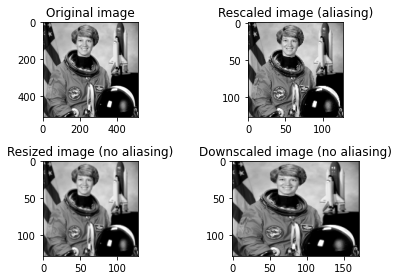

In [8]:
import matplotlib.pyplot as plt

from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

image = color.rgb2gray(data.astronaut())

image_rescaled = rescale(image, 0.25, anti_aliasing=False)
image_resized = resize(image, (image.shape[0] // 4, image.shape[1] // 4),
                       anti_aliasing=True)
image_downscaled = downscale_local_mean(image, (4, 3))

fig, axes = plt.subplots(nrows=2, ncols=2)

ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original image")

ax[1].imshow(image_rescaled, cmap='gray')
ax[1].set_title("Rescaled image (aliasing)")

ax[2].imshow(image_resized, cmap='gray')
ax[2].set_title("Resized image (no aliasing)")

ax[3].imshow(image_downscaled, cmap='gray')
ax[3].set_title("Downscaled image (no aliasing)")

ax[0].set_xlim(0, 512)
ax[0].set_ylim(512, 0)
plt.tight_layout()
plt.show()